<h2>Unit 8 Live Session </center> </h2>
<h4> W203 Instructional Team </h4>

#### Confidence Intervals and Hypothesis Tests
<center>![title](hypothesis.jpg)</center>

#### Class Announcements
1. Announcement 1
2. Announcement 2
3. Announcement 3

#### 1.0 t-Distribution Functions in R

Suppose $X_1,X_2,...,X_n$ is an i.i.d random sample from a normal distribution with mean $\mu$ and ** known standard deviation **. Then, 

$$ Z_{score} = \frac{ \overline{X}_n - \mu}{\sqrt{\frac{\sigma^2}{n}}} \sim N(0,1) $$

This can be easily simulated, first we set up our Z score function 

In [2]:
zscore <- function(x,mu,var,n){(mean(x) - mu)/(sqrt(var/n))}

Now we will simulate 100000 samples of 100 observations from $N(\mu,\sigma^2)$

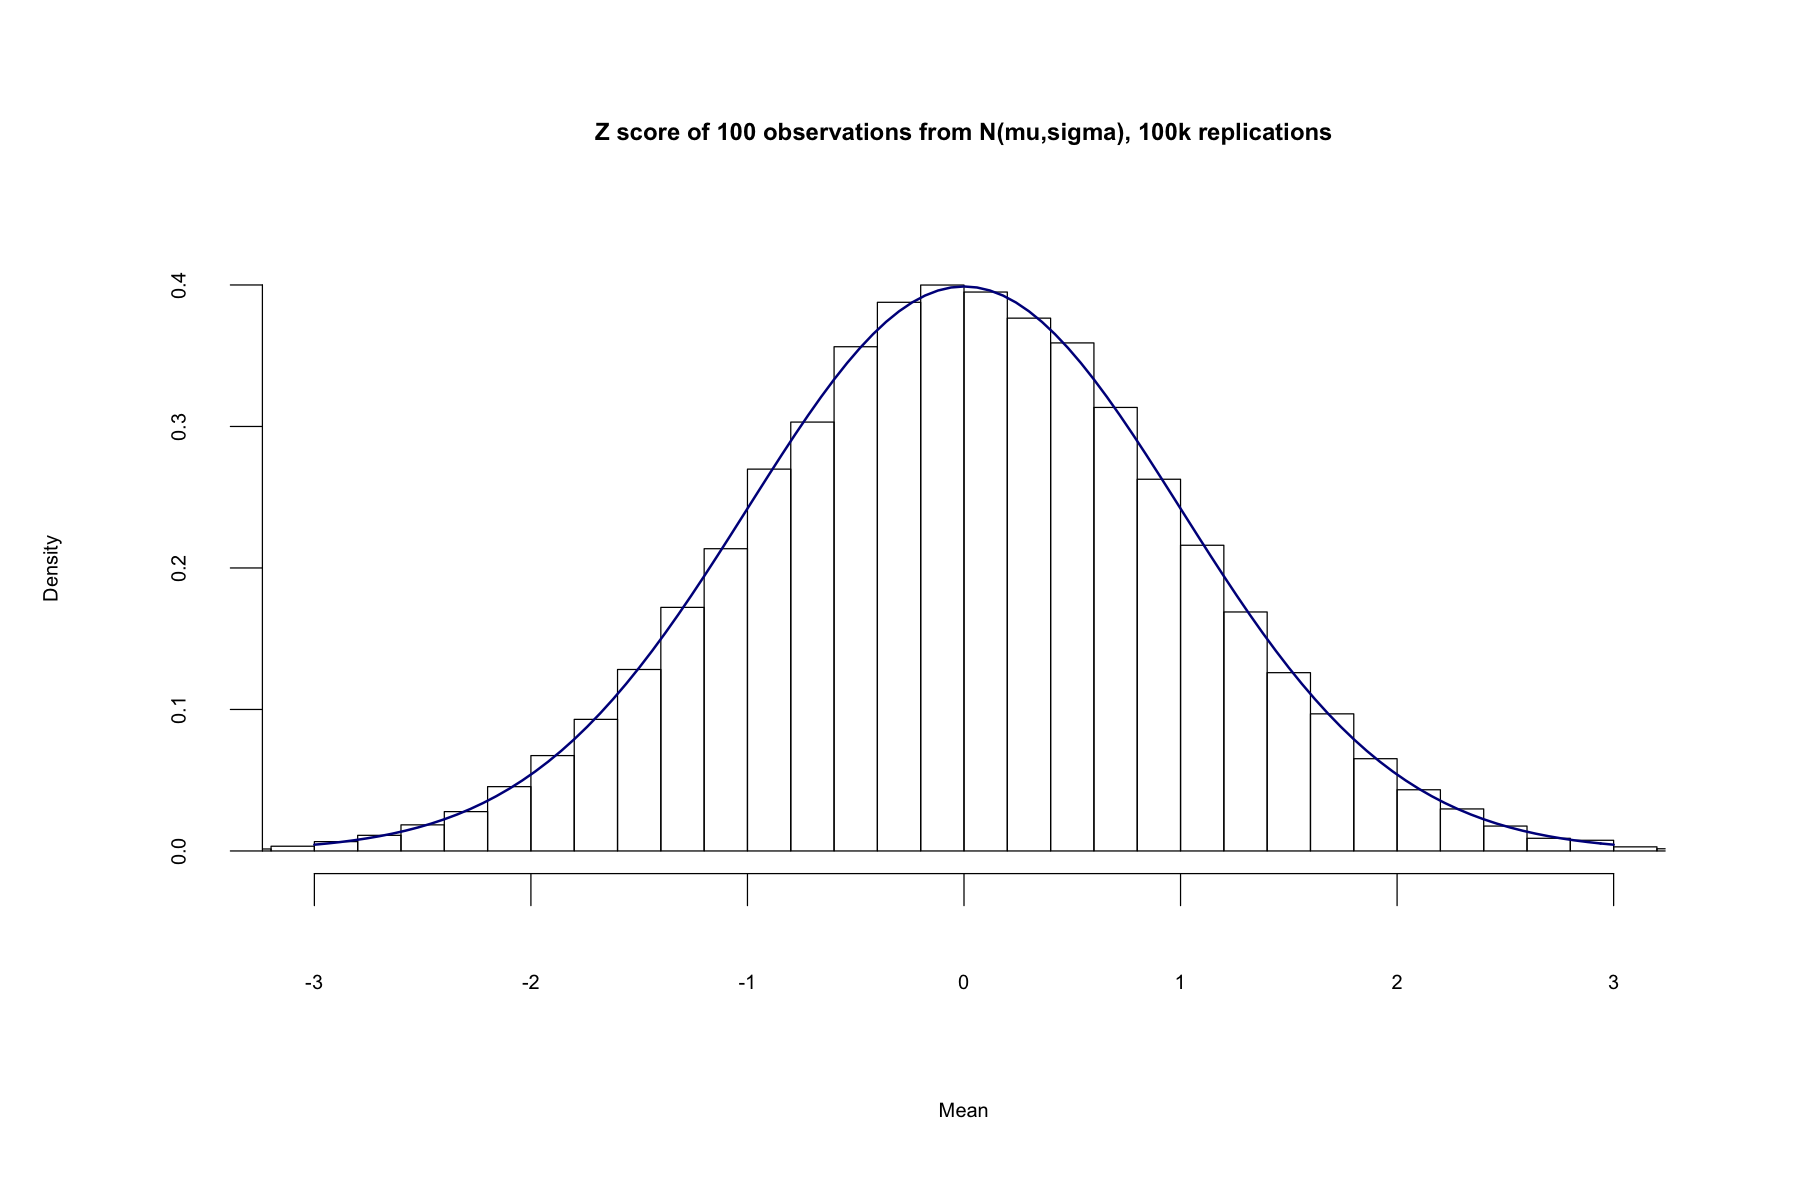

In [4]:
nobs <- 100
mu1 <- 10
sd1 <- 2
obs_rep1 <- replicate(100000, rnorm(nobs,mean = mu1, sd = sd1),simplify = 'array')
z_obs <- apply(obs_rep1 ,2, zscore, mu = mu1, var = sd1^2, n = nobs )
options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 32)
hist(z_obs, breaks = 50, main = "Z score of 100 observations from N(mu,sigma), 100k replications"
                  ,xlim = c(-3,3) , freq = FALSE, xlab = "Mean")
curve(dnorm(x, mean=0, sd=1), 
          col="darkblue", lwd=2, add=TRUE, yaxt="n")

Note that this is only true when we know the variance of $X$, 

If the variance of $X$ is ** not known ** we will have to estimate it in order to determine the distribution of $\overline{X}_n$ which is different from the normal
$$ t_{score} = \frac{ \overline{X}_n - \mu}{\sqrt{\frac{s^2}{n}}} \sim t^{(n-1)} \hspace{1cm} \text{where} \hspace{1cm} s^2 = (n-1)^{-1}\sum_{i=1}^n(X_i - \overline{X}_n)^2 \;\;\;  $$
Again easily simulated by setting up our tscore function

In [6]:
tscore <- function(x,mu,n){(mean(x) - mu)/(sqrt(sd(x)^2/n))}

Now we will simulate the $t_{score}$ with 100000 samples of 100 observations from $N(\mu,\sigma^s)$

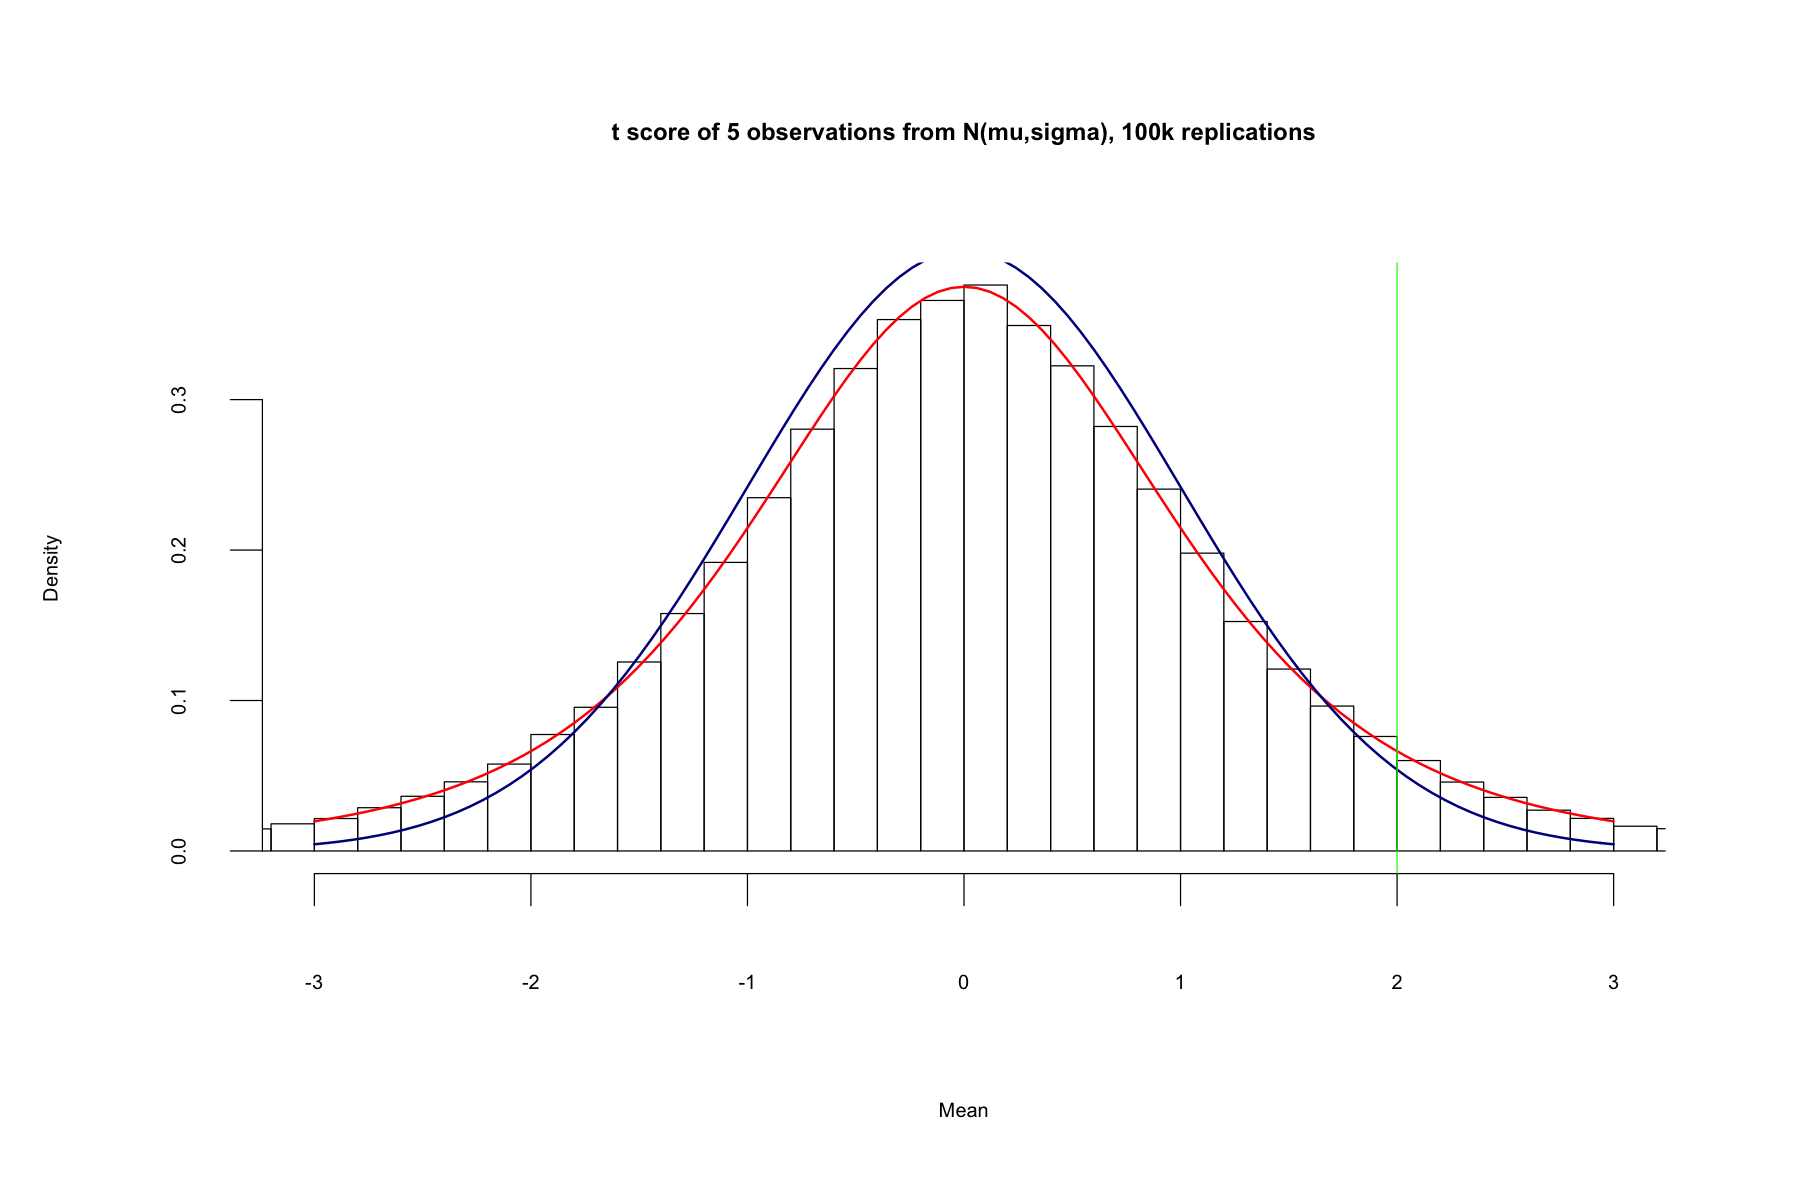

In [31]:
nobs <- 5
mu2 <- 10
sd2 <- 2
df <- 7
obs_rep1 <- replicate(100000, rnorm(nobs,mean = mu2, sd = sd2),simplify = 'array')
t_obs1 <- apply(obs_rep1 ,2, tscore, mu = mu2, n = nobs )


hist(t_obs1, breaks = 200, main = "t score of 5 observations from N(mu,sigma), 100k replications"
                  ,xlim = c(-3,3), freq = FALSE, xlab = "Mean")
curve(dt(x, nobs-1), col="red", lwd=2, add=TRUE, yaxt="n")
curve(dnorm(x, mean=0, sd=1), col="darkblue", lwd=2, add=TRUE, yaxt="n")
abline(v=2,col = 'green')

Now suppose the $X$ has a distribution other than normal which is not known, what do we do? We have to rely on the CLT meaning that if the CLT is satisfied.
$$ Z_{score} = \frac{ \overline{X}_n - \mu}{\sqrt{\frac{\sigma^2}{n}}} \rightarrow N(0,1)$$
As we saw in previous weeks this is an asymptotic result meaning we need enough observations depending on the skewness of $X$. Even then we won't know $\sigma^2$ so if we can justify the CLT we will still assume  
$$ \frac{ \overline{X}_n - \mu}{\sqrt{\frac{s^2}{n}}} \sim t^{(n-1)} \hspace{1cm} \text{where} \hspace{1cm} s^2 = (n-1)^{-1}\sum_{i=1}^n(X_i - \overline{X}_n)^2 \;\;\;  $$

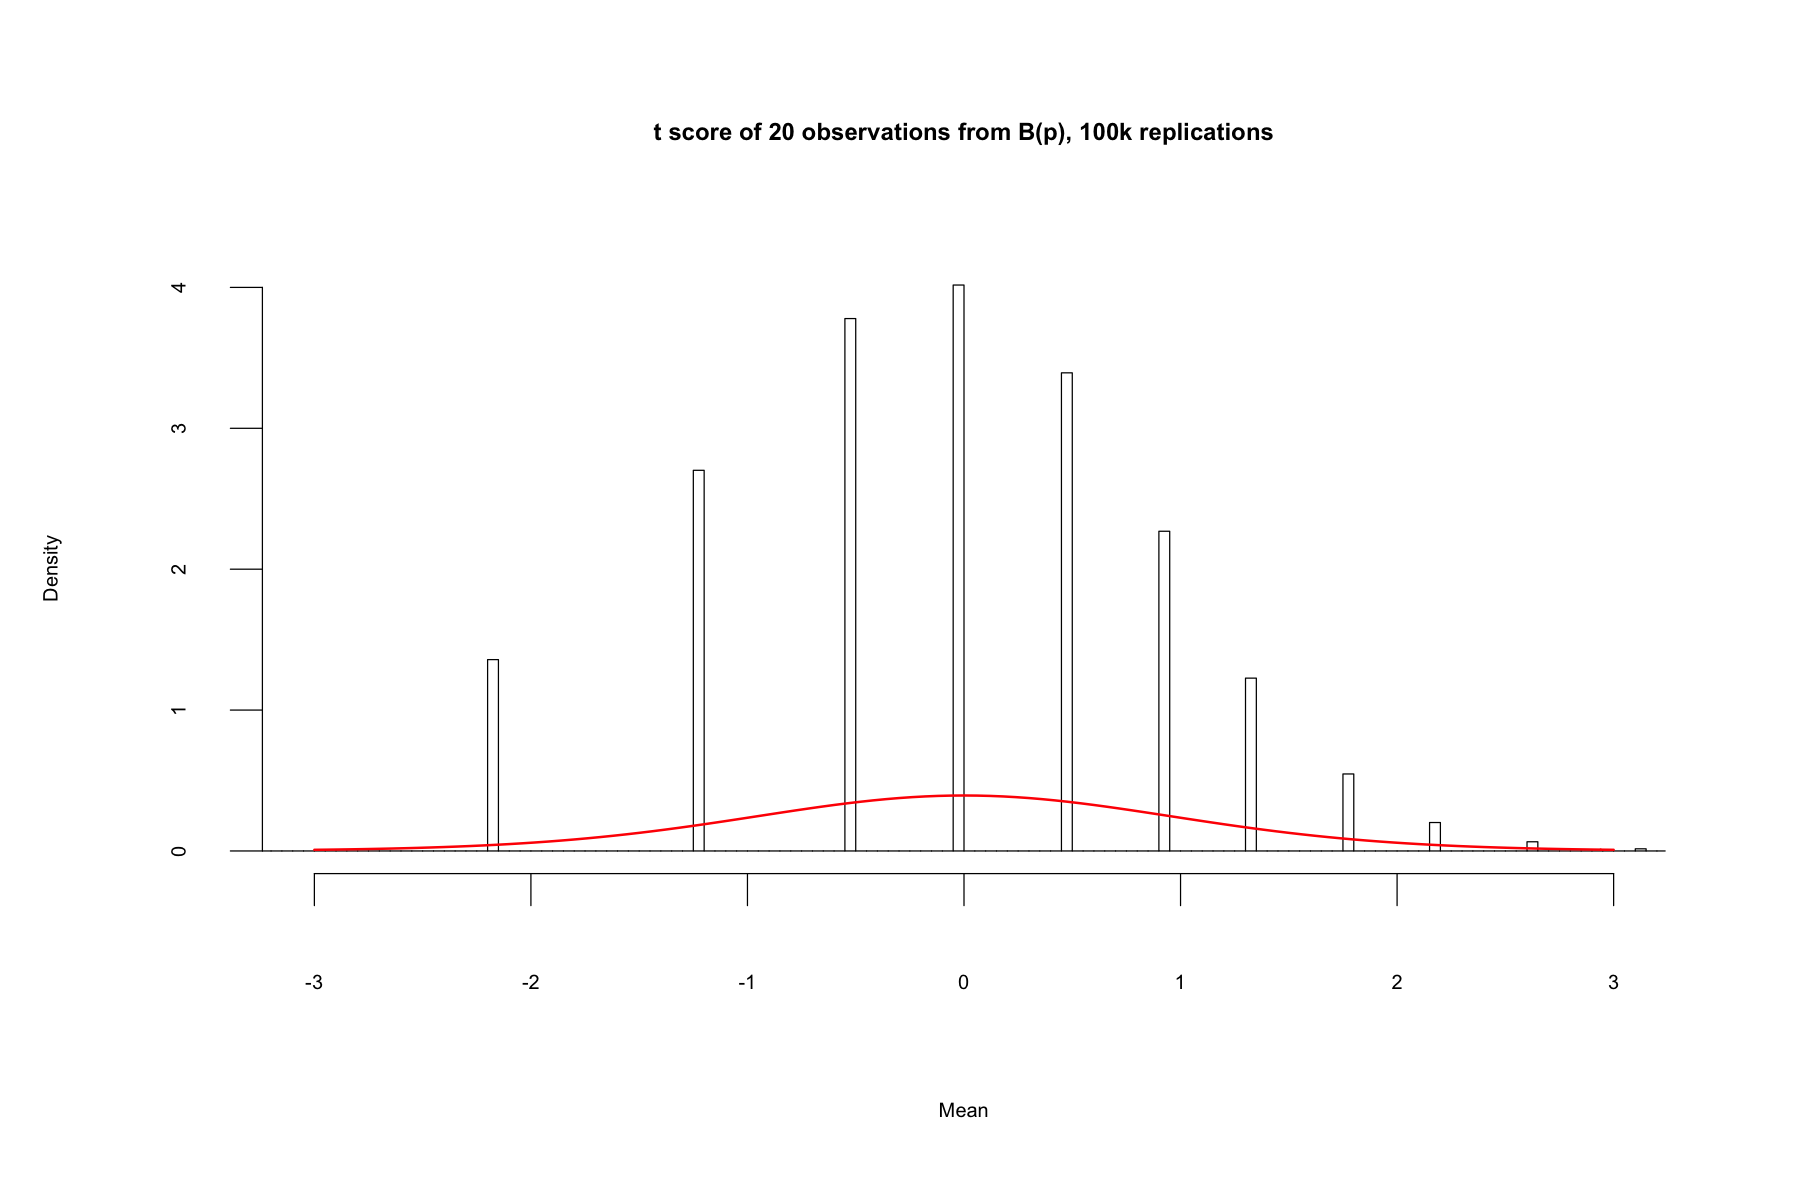

In [8]:
nobs <- 20
p <- 0.25
obs_rep2 <- replicate(100000, rbinom(nobs,1,p),simplify = 'array')
t_obs2 <- apply(obs_rep2 ,2, tscore, mu = p, n = nobs )

hist(t_obs2, breaks = 200, main = "t score of 20 observations from B(p), 100k replications"
                  ,xlim = c(-3,3), freq = FALSE, xlab = "Mean")
curve(dt(x, nobs-1), col="red", lwd=2, add=TRUE, yaxt="n")

** In Conclusion ** 

1. If $X$ is normally distributed and the variance is known then use the $Z_{score}$ and normal distribution

2. If $X$ is normally distributed and the variance is unknown then use the $t_{score}$ and student distribution

3. If $X$ is not normally distributed then if $\{X_i\}_{i=1}^n$ is credibly i.i.d and the distribution of $X$ is not too skewed for the number observations use the $t_{score}$ and student distribution.

#### 2.0 Practice with T-Distributions

In R, we can use the following functions to find the values needed for t-tests. Specifically, we can find the density, distribution function, quantile function and random generation for the t distribution with df degrees of freedom (and optional non-centrality parameter ncp):

dt gives the density, pt gives the distribution function, qt gives the quantile function, and rt generates random deviates. 

** Usage **

dt(x, df, ncp, log = FALSE) 

pt(q, df, ncp, lower.tail = TRUE, log.p = FALSE) 

qt(p, df, ncp, lower.tail = TRUE, log.p = FALSE) 

rt(n, df, ncp) 

** 2.1 ** What is the 2.5th and 97.5th percentiles of the t distribution with 5 degrees of freedom?

** 2.2 ** What is the 2.5th and 97.5th percentiles of the t distribution with 1 to 10 degrees of freedom?

#### 3.0 P-Values and Confidence Intervals

In a warehouse full of power packs labeled as 12 volts we randomly measured the voltage of 7 of these: 11.77, 11.90, 11.64, 11.84, 12.13, 11.99, and 11.77. 

** 3.1 ** Find the mean and the standard deviation. 

** 3.2 ** What is the critical value for a 95% confidence interval for this sample?

** 3.3 ** Find the 95% confidence interval for the mean.

** 3.4 ** Define a test statistic, that tests whether the mean is 12.

** 3.5 ** Calculate the p-value using the t statistic.  Should you reject the null hypothesis?  (Also, could you predict what would happen from your answer to (3)?)

** 3.6 ** Suppose you were to use a normal distribution instead of a t-distribution to test your hypothesis.  What would your p-value be for the z-test?

#### 4.0 Executing t-tests in R

The file athlet2.Rdata contains data on college football games.  The data is provided by Wooldridge and was collected by Paul Anderson, an MSU economics major, for a term project.  Football records and scores are from 1993 football season.

In [24]:
load("athlet2.RData")

We are especially interested in the variable, dscore, which represents the score differential, home team score - visiting team score.  We would like to test whether a home team really has an advantage over the visiting team.

** 4.1 ** The instructor will assign you to one of two teams.  Team 1 will argue that the t-test is appropriate to this scenario.  Team 2 will argue that the t-test is invalid.  Take a few minutes to examine the data, then formulate your best argument.

** 4.2 ** Should you perform a one-tailed test or a two-tailed test?  What is the strongest argument for your answer?

** 4.3 ** Execute the t-test and interpret every component of the output.

** 4.4 ** Based on your output, suggest a different hypothesis that would have led to a different test result.  Try executing the test to confirm that you are correct.

#### 5.0 Assumptions Behind the t-test

** 5.1 ** You have a sample of 50 CEO salaries, and you want to know whether the mean salary is greater than $1 million.

** 5.2 ** A nonprofit organization measures the percentage of students that pass an 8th grade reading test in 40 neighboring California counties.  You are interested in whether the percentage of students that pass in California is over 80%

#### 6.0 Your own T-Test Function

** 6.1 ** Using your understanding of the procedure for a one-sample t-test, write your own function to execute the test.  You may use the following function header.

** 6.2 ** Autogenerate a sequence of 20 values and use it as the input of your function. Did you reject or fail to reject the null hypothesis?

** 6.3 ** How can you test that the function we created works properly?  